In [2]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [ ]:
Title: Operational forecasting of sea-ice motion using a convolutional neural network (CNN)

#--------------
#--------------
Overview:
#--------------
#--------------
The data provided here are daily predictions zonal and meridional sea-ice velocity components in the 25-km EASE-grid.
There are fifteen different predictions based on the ensemble of fifteen models we trained. These can be averaged to get an ensemble mean prediction (see more information below). 
Each velocity component will have the shape: [lat, lon, ensemble] = [361, 361, 15].

#--------------
#--------------
Methods:
#--------------
#--------------
A convolutional neural network (CNN) is trained to make one-day predictions of sea-ice velocity from inputs of present-day wind velocity and previous-day sea-ice concentration. The model architecture is described in Hoffman et al. (2023). We apply a k-fold cross validation and train fifteen different models, shuffling the data used in the train, validation and test datasets. A prediction is provided by each of the fifteen different models. These can be averaged to get an ensemble mean prediction.

#--------------
#--------------
Data:
#--------------
#--------------
(a) Training:
#--------------
The following data are used to train the CNN model:
Model Training: daily, 1979-2021, 25-km EASE grid
Inputs: 
(i) Present-day wind velocity, JRA55-do [Daily mean of 3-hourly ; Re-grid to EASE] (Tsujino et al. 2018)
(ii) Previous-day ice concentration, Nimbus-7 passive microwave [Re-grid to EASE ; Fill in polar NaN hole] (Cavalieri et al. 1996)

Output:
(i) Present-day sea-ice velocity, daily, Polar Pathfinder (Tschudi et al. 2019)

(b) Forecasting:
#--------------
The following data are used to make predictions:
Inputs:
(i)Present-day wind velocity, NCEP FNL 1-degree [https://rda.ucar.edu/datasets/ds083.2/# ; Daily mean of 4-hourly: previous / present day combination (06h, 12h,18h previous ; 00h present) ; Re-grid to EASE]
(ii) Previous-day ice concentration, Near-Real-Time DMSP SSMIS Daily Polar Gridded Sea Ice Concentrations, Version 2  [Re-grid to EASE ;Fill in polar NaN hole]*** (DiGirolamo et al. 2022)

Output:
(i) Present-day sea-ice velocity, daily, CNN prediction 

***On occasion NSIDC doesn’t post the previous-day ice concentration in time. For this case, we use the ice concentration from the day before. We have included a variable in the NetCDF indicating which day the sea-ice concentration input is from.

Pre-Processing
#--------------
For all of the data we also pre-process by:
(i) remove the seasonal cycle by subtracting the daily climatological mean
(ii) apply grid-wise feature scaling (i.e. set to zero mean and unit standard deviation)
(iii) set NaN values to zero due to limitations of the CNN in accepting NaNs as inputs

Post-Processing
#--------------
We post-process the model prediction by:
(i) un-standardizing (i.e. adding back the mean and standard deviations at each gridpoint)
(ii) adding the daily climatology back in



#--------------
#--------------
Citations:
#--------------
#--------------
Cavalieri, D., C. Parkinson, P. Gloersen, and H. Zwally, 1996: Sea ice concentrations from Nimbus-7 SMMR and DMSP SSM/ I-SSMIS passive microwave data, version 1. NASA National Snow and Ice Data Center Distributed Active Archive Center, accessed 8 March 2021, https://doi.org/10.5067/8G Q8LZQVL0VL.

DiGirolamo, N., Parkinson, C. L., Cavalieri, D. J., Gloersen, P. & Zwally, H. J. (2022). Sea Ice Concentrations from Nimbus-7 SMMR and DMSP SSM/I-SSMIS Passive Microwave Data, Version 2 [Data Set]. Boulder, Colorado USA. NASA National Snow and Ice Data Center Distributed Active Archive Center. https://doi.org/10.5067/MPYG15WAA4WX. Date Accessed 06-24-2024.

Hoffman, L., Mazloff, M., Gille, S.T., Giglio, D., Bitz, C., Heimbach, P., and  Matsuyoshi, K.,2023: Machine learning for daily forecasts of Arctic sea ice motion: an attribution assessment of model predictive skill. AIES. 2(4). https://doi.org/10.1175/AIES-D-23-0004.1

National Centers for Environmental Prediction/National Weather Service/NOAA/U.S. Department of Commerce. 2000, updated daily. NCEP FNL Operational Model Global Tropospheric Analyses, continuing from July 1999. Research Data Archive at the National Center for Atmospheric Research, Computational and Information Systems Laboratory. https://doi.org/10.5065/D6M043C6. Accessed† 2024.

Tschudi, M., W. Meier, J. Stewart, C. Fowler, and J. Maslanik, 2019: Polar pathfinder daily 25 km EASE-grid sea ice motion vectors, version 4. NASA National Snow and Ice Data Center, accessed 8 March 2021, https://doi.org/10.5067/ INAWUWO7QH7B.

Tsujino, H., and Coauthors, 2018: JRA-55 based surface dataset for driving ocean–sea-ice models (JRA55-do). Ocean Modell., 130, 79–139, https://doi.org/10.1016/j.ocemod.2018.07.002.


<xarray.Dataset> Size: 33MB
Dimensions:  (x: 361, y: 361, m: 15, t: 1)
Dimensions without coordinates: x, y, m, t
Data variables:
    ui       (x, y, m) float64 16MB ...
    vi       (x, y, m) float64 16MB ...
    lat      (x, y) float64 1MB ...
    lon      (x, y) float64 1MB ...
    time     (t) float64 8B ...
    sicdate  (t) float64 8B ...
Attributes:
    title:         Near-Real-Time Daily Gridded Sea Ice Motion Neural Network...
    summary:       This data set provides a Near-Real-Time (NRT) map of sea i...
    contributors:  Hoffman, L., M. R. Mazloff, S. T. Gille, and D. Giglio
    institution:   Scripps Institution of Oceanography, University of Califor...
(361, 361, 15)


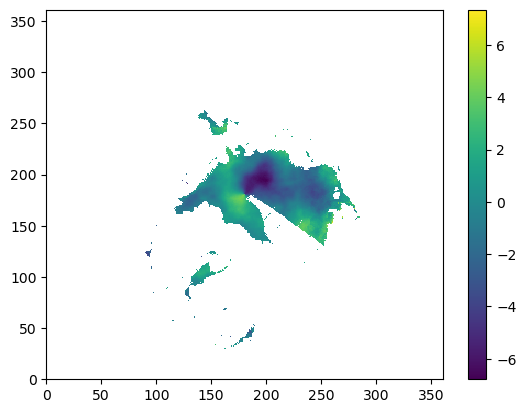

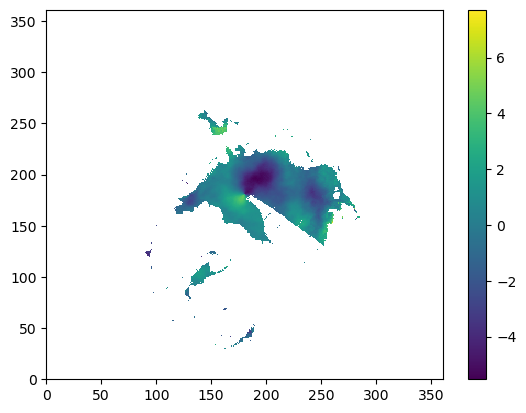

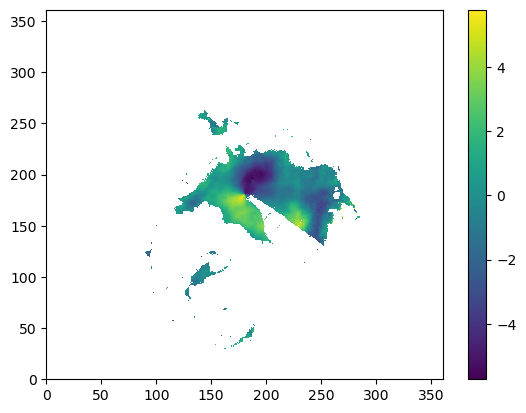

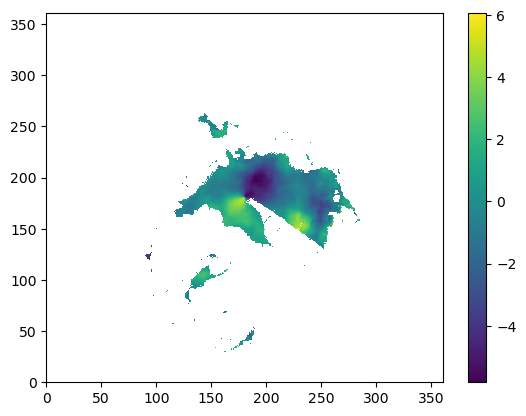

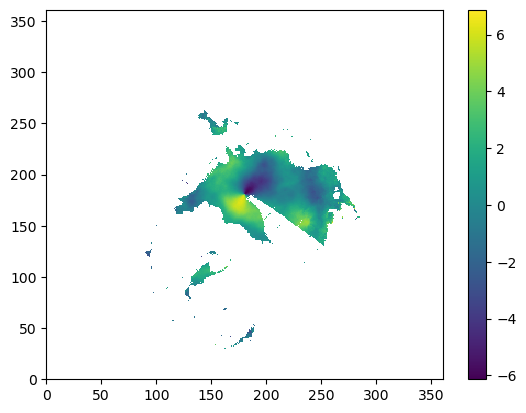

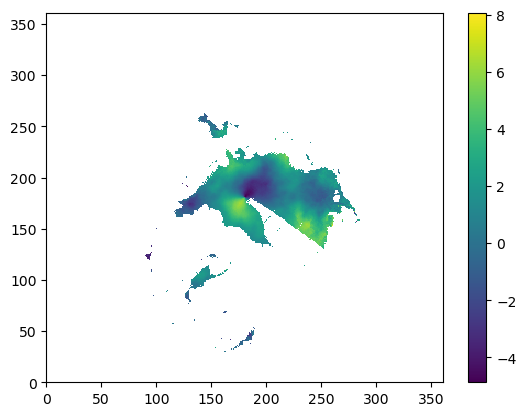

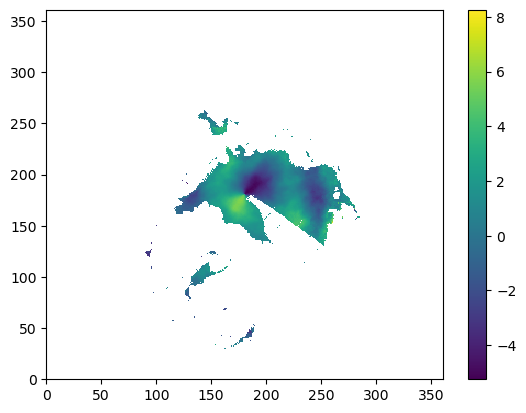

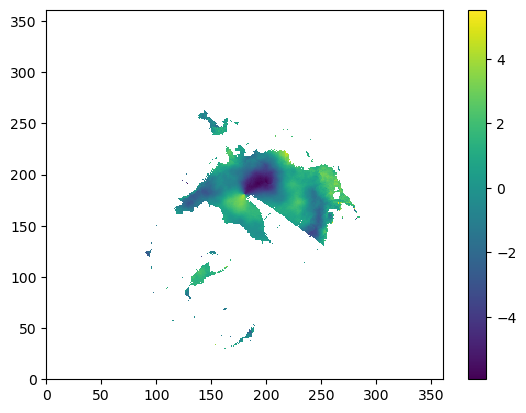

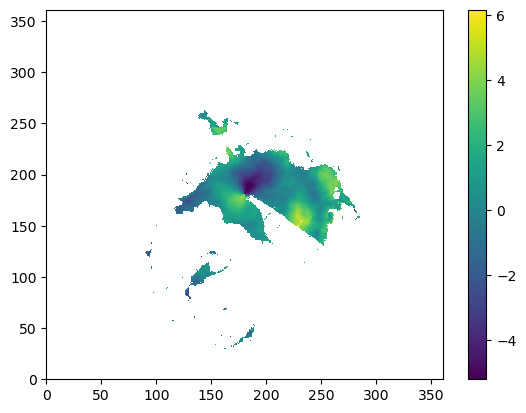

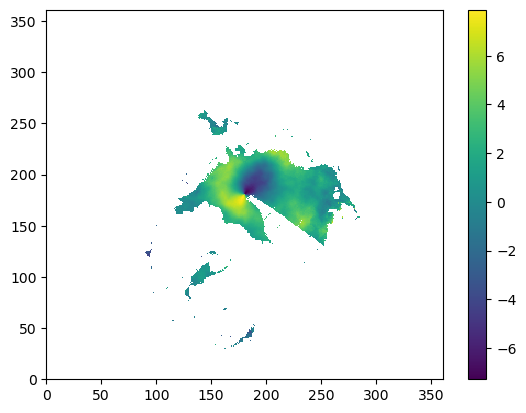

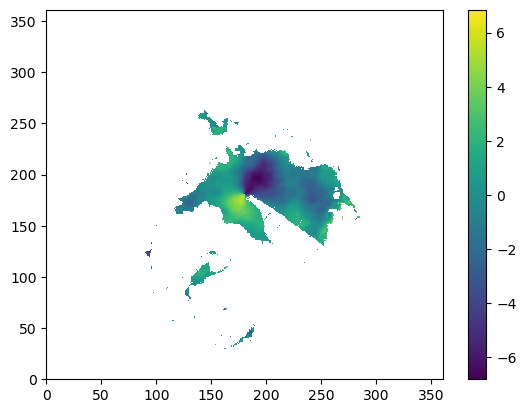

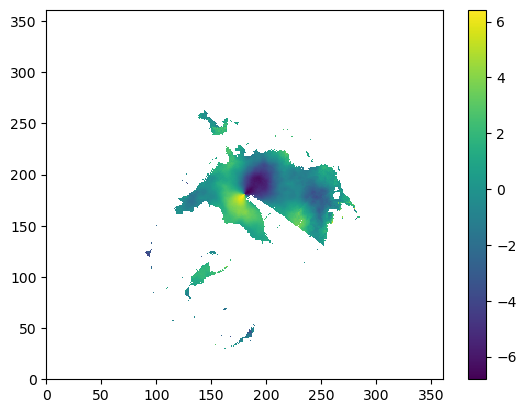

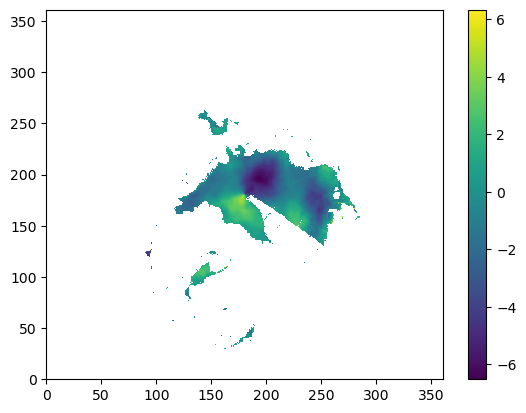

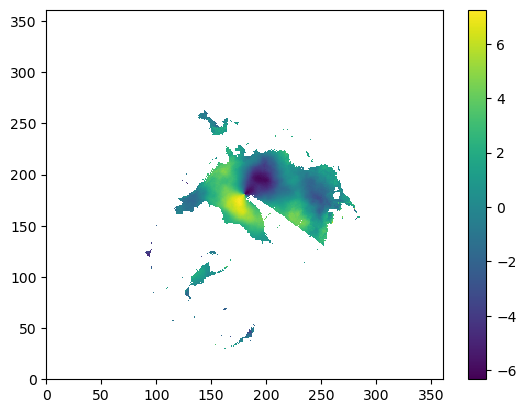

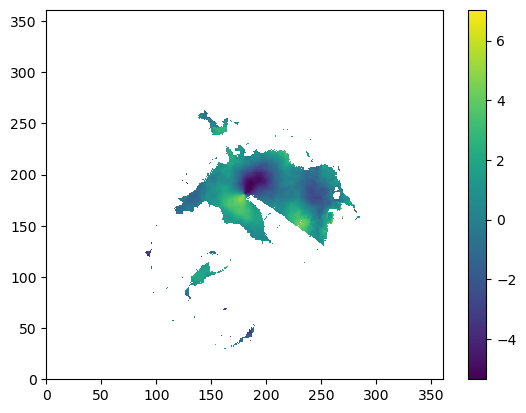

In [6]:
fnam = "/Users/jackbassham/Downloads/cnn_forecast_sivel_arctic_20240719.nc"

with xr.open_dataset(fnam) as ds:
    print(ds)
    print(np.shape(ds.ui))
    for i in range(len(ds.m)):
        plt.pcolormesh(ds.ui[:,:,i])
        plt.colorbar()
        plt.show()
    # plt.pcolormesh(ds.vi)
    # plt.show()